In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
from google.colab import files
Uploaded = files.upload()

Saving wine_data.csv to wine_data (1).csv


# IMPORTING AND MANAGING OUR FEATURED DATASET

In [58]:
df = pd.read_csv("wine_data.csv" , header = None, usecols = [0, 1, 2])
df.columns = ["Class labels", "Alcohol", "Malic acid"]
df

,Class labels,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


In [59]:
df.shape

(178, 3)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Class labels  178 non-null    int64  
 1   Alcohol       178 non-null    float64
 2   Malic acid    178 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 4.3 KB


In [61]:
df.describe()

,Class labels,Alcohol,Malic acid
count,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348
std,0.775035,0.811827,1.117146
min,1.000000,11.030000,0.740000
25%,1.000000,12.362500,1.602500
50%,2.000000,13.050000,1.865000
75%,3.000000,13.677500,3.082500
max,3.000000,14.830000,5.800000


# Plotting Each Columns

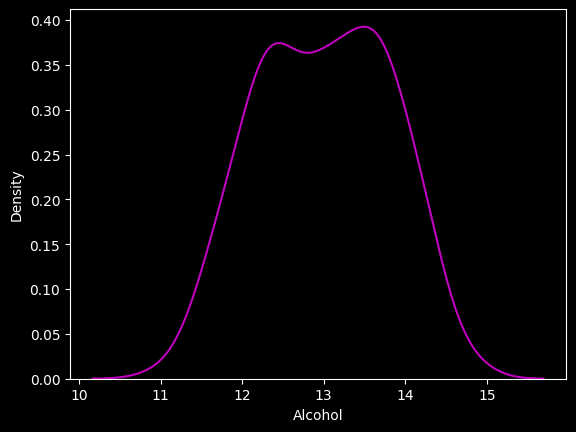

In [62]:

plt.style.use("dark_background")
sns.kdeplot(data = df , x="Alcohol", color="m")
plt.show()

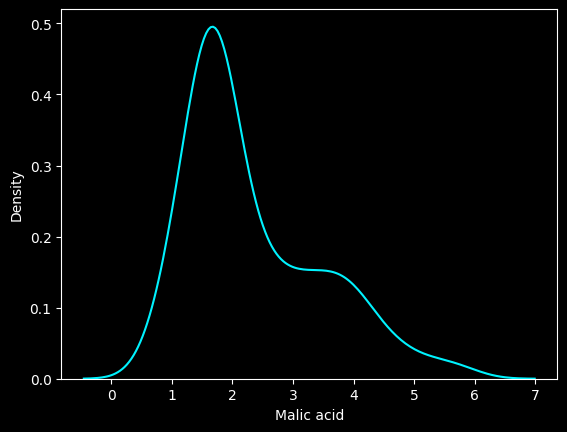

In [81]:
sns.kdeplot(data = df, x = "Malic acid", color = "#00f2fe")
plt.show()

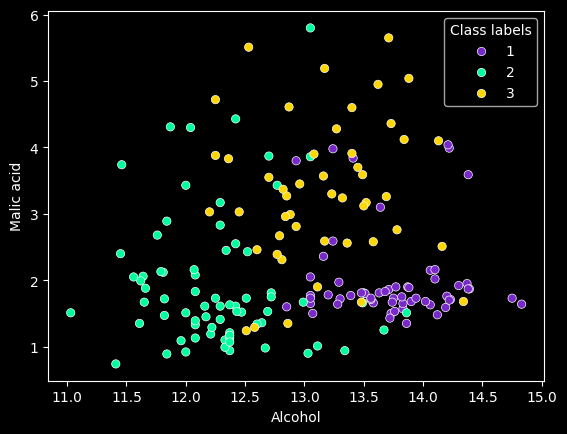

In [87]:
dict={1:'#7928ca',2:'#00ff9d',3:'#ffd700'}
sns.scatterplot(data = df, x="Alcohol", y="Malic acid", hue = "Class labels", palette=dict)
plt.show()

# Train - Test - Split

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class labels', axis=1),
                                                    df['Class labels'],
                                                    test_size=0.3,
                                                    random_state=0)

In [67]:
X_train.shape, X_test.shape

((124, 2), (54, 2))

# Scaling The Values Using
# MinMaxScaling

In [68]:
from sklearn.preprocessing import MinMaxScaler

In [69]:
scaler = MinMaxScaler()

* Creating an object for MinMaxScaler

In [70]:
scaler.fit(X_train)

MinMaxScaler()

* We only fit training data but transform both Training and testing data

In [71]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

* Now we create scaled name variables.
* and than make their DataFrames.

In [72]:
X_train_scaled

,Alcohol,Malic acid
0,0.720430,0.203782
1,0.319892,0.084034
2,0.602151,0.712185
3,0.572581,0.563025
4,0.760753,0.130252
...,...,...
119,0.212366,0.174370
120,0.360215,0.058824
121,0.373656,0.151261
122,0.771505,0.165966


In [73]:
X_test_scaled.head()

,Alcohol,Malic acid
0,0.728495,0.163866
1,0.473118,0.373950
2,0.360215,0.050420
3,0.680108,0.176471
4,0.543011,1.031513


In [74]:
np.round(X_train.describe() , 1)

,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [75]:
np.round(X_train_scaled.describe(), 1)

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


 * Here we clearly see the Difference between our unscaled and scaled datasets
* Scaled values are lie between range
[0 to 1]

# Exploratory Data Analysis of Scaled values

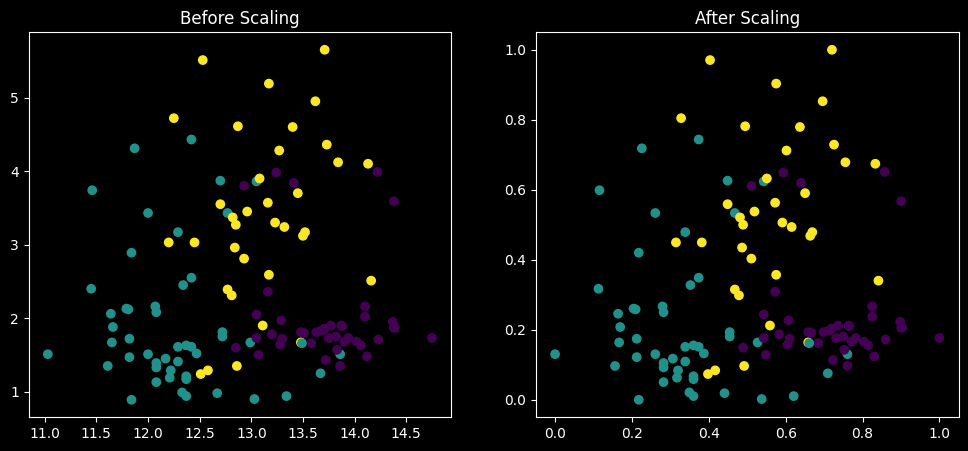

In [76]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Alcohol'], X_train['Malic acid'],c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Alcohol'], X_train_scaled['Malic acid'],c=y_train)
ax2.set_title("After Scaling")
plt.show()

* Scaled value
 * Axis changes after scaling

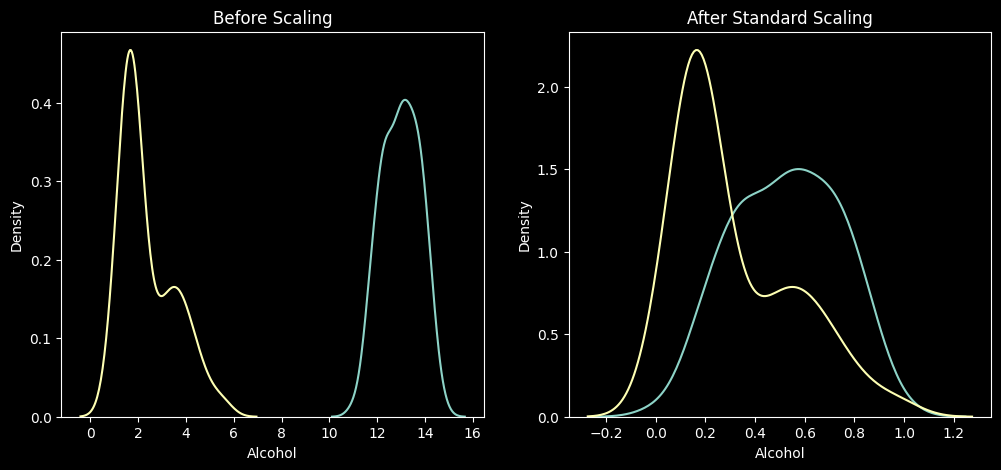

In [77]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)
sns.kdeplot(X_train['Malic acid'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
plt.show()

* Before scaling our graph had not any common parts.
* But after scaling graphs become correlated.

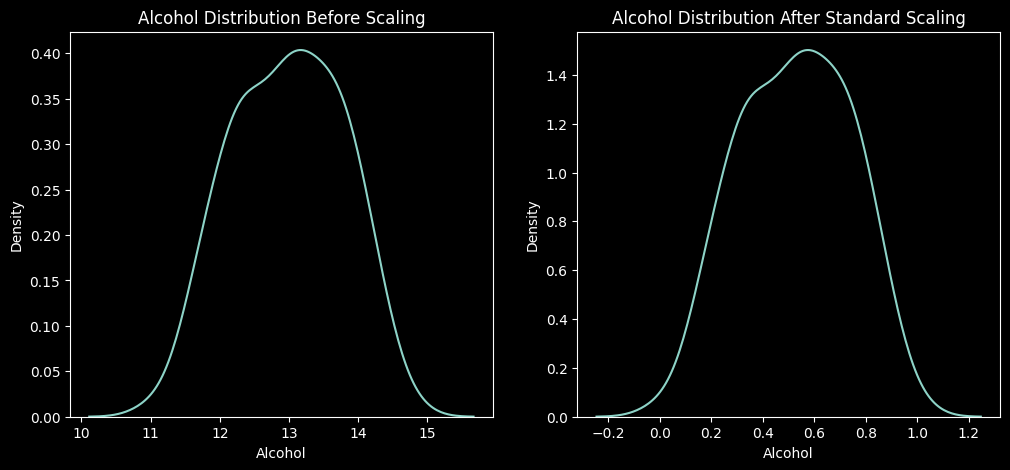

In [78]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Alcohol Distribution Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)

# after scaling
ax2.set_title('Alcohol Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
plt.show()

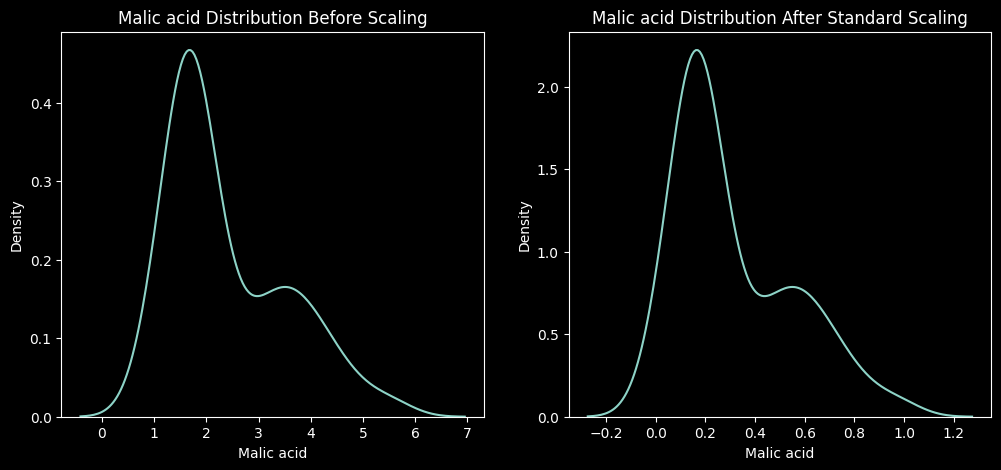

In [79]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Malic acid Distribution Before Scaling')
sns.kdeplot(X_train['Malic acid'], ax=ax1)

# after scaling
ax2.set_title('Malic acid Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
plt.show()

* Both The graphs axis changes after scaling